In [ ]:
#找规律，相关度（heatmap）

#前期的数据检视 (column)

#找规律，相关度（heatmap）

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the file
song_data = pd.read_csv("song_data.csv")
df = pd.DataFrame(song_data)


In [32]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
# check the total number of the music pieces
num_rows = song_data.shape[0]
num_rows

18835

In [19]:
print(song_data.columns.tolist())

['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


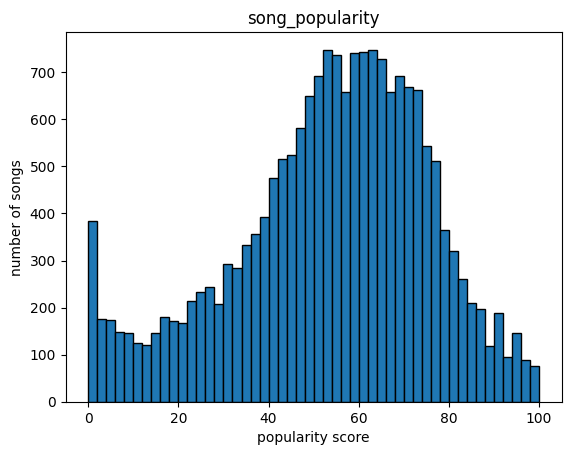

In [30]:
song_popularity_distribution = song_data["song_popularity"]
plt.hist(song_popularity_distribution, bins=50, edgecolor='black')
plt.title("song_popularity")
plt.xlabel("popularity score")
plt.ylabel("number of songs")
plt.show()

In [35]:
print(song_data.head())  # Inspect the first few rows
print(song_data.dtypes)  # Check the data types of each column

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

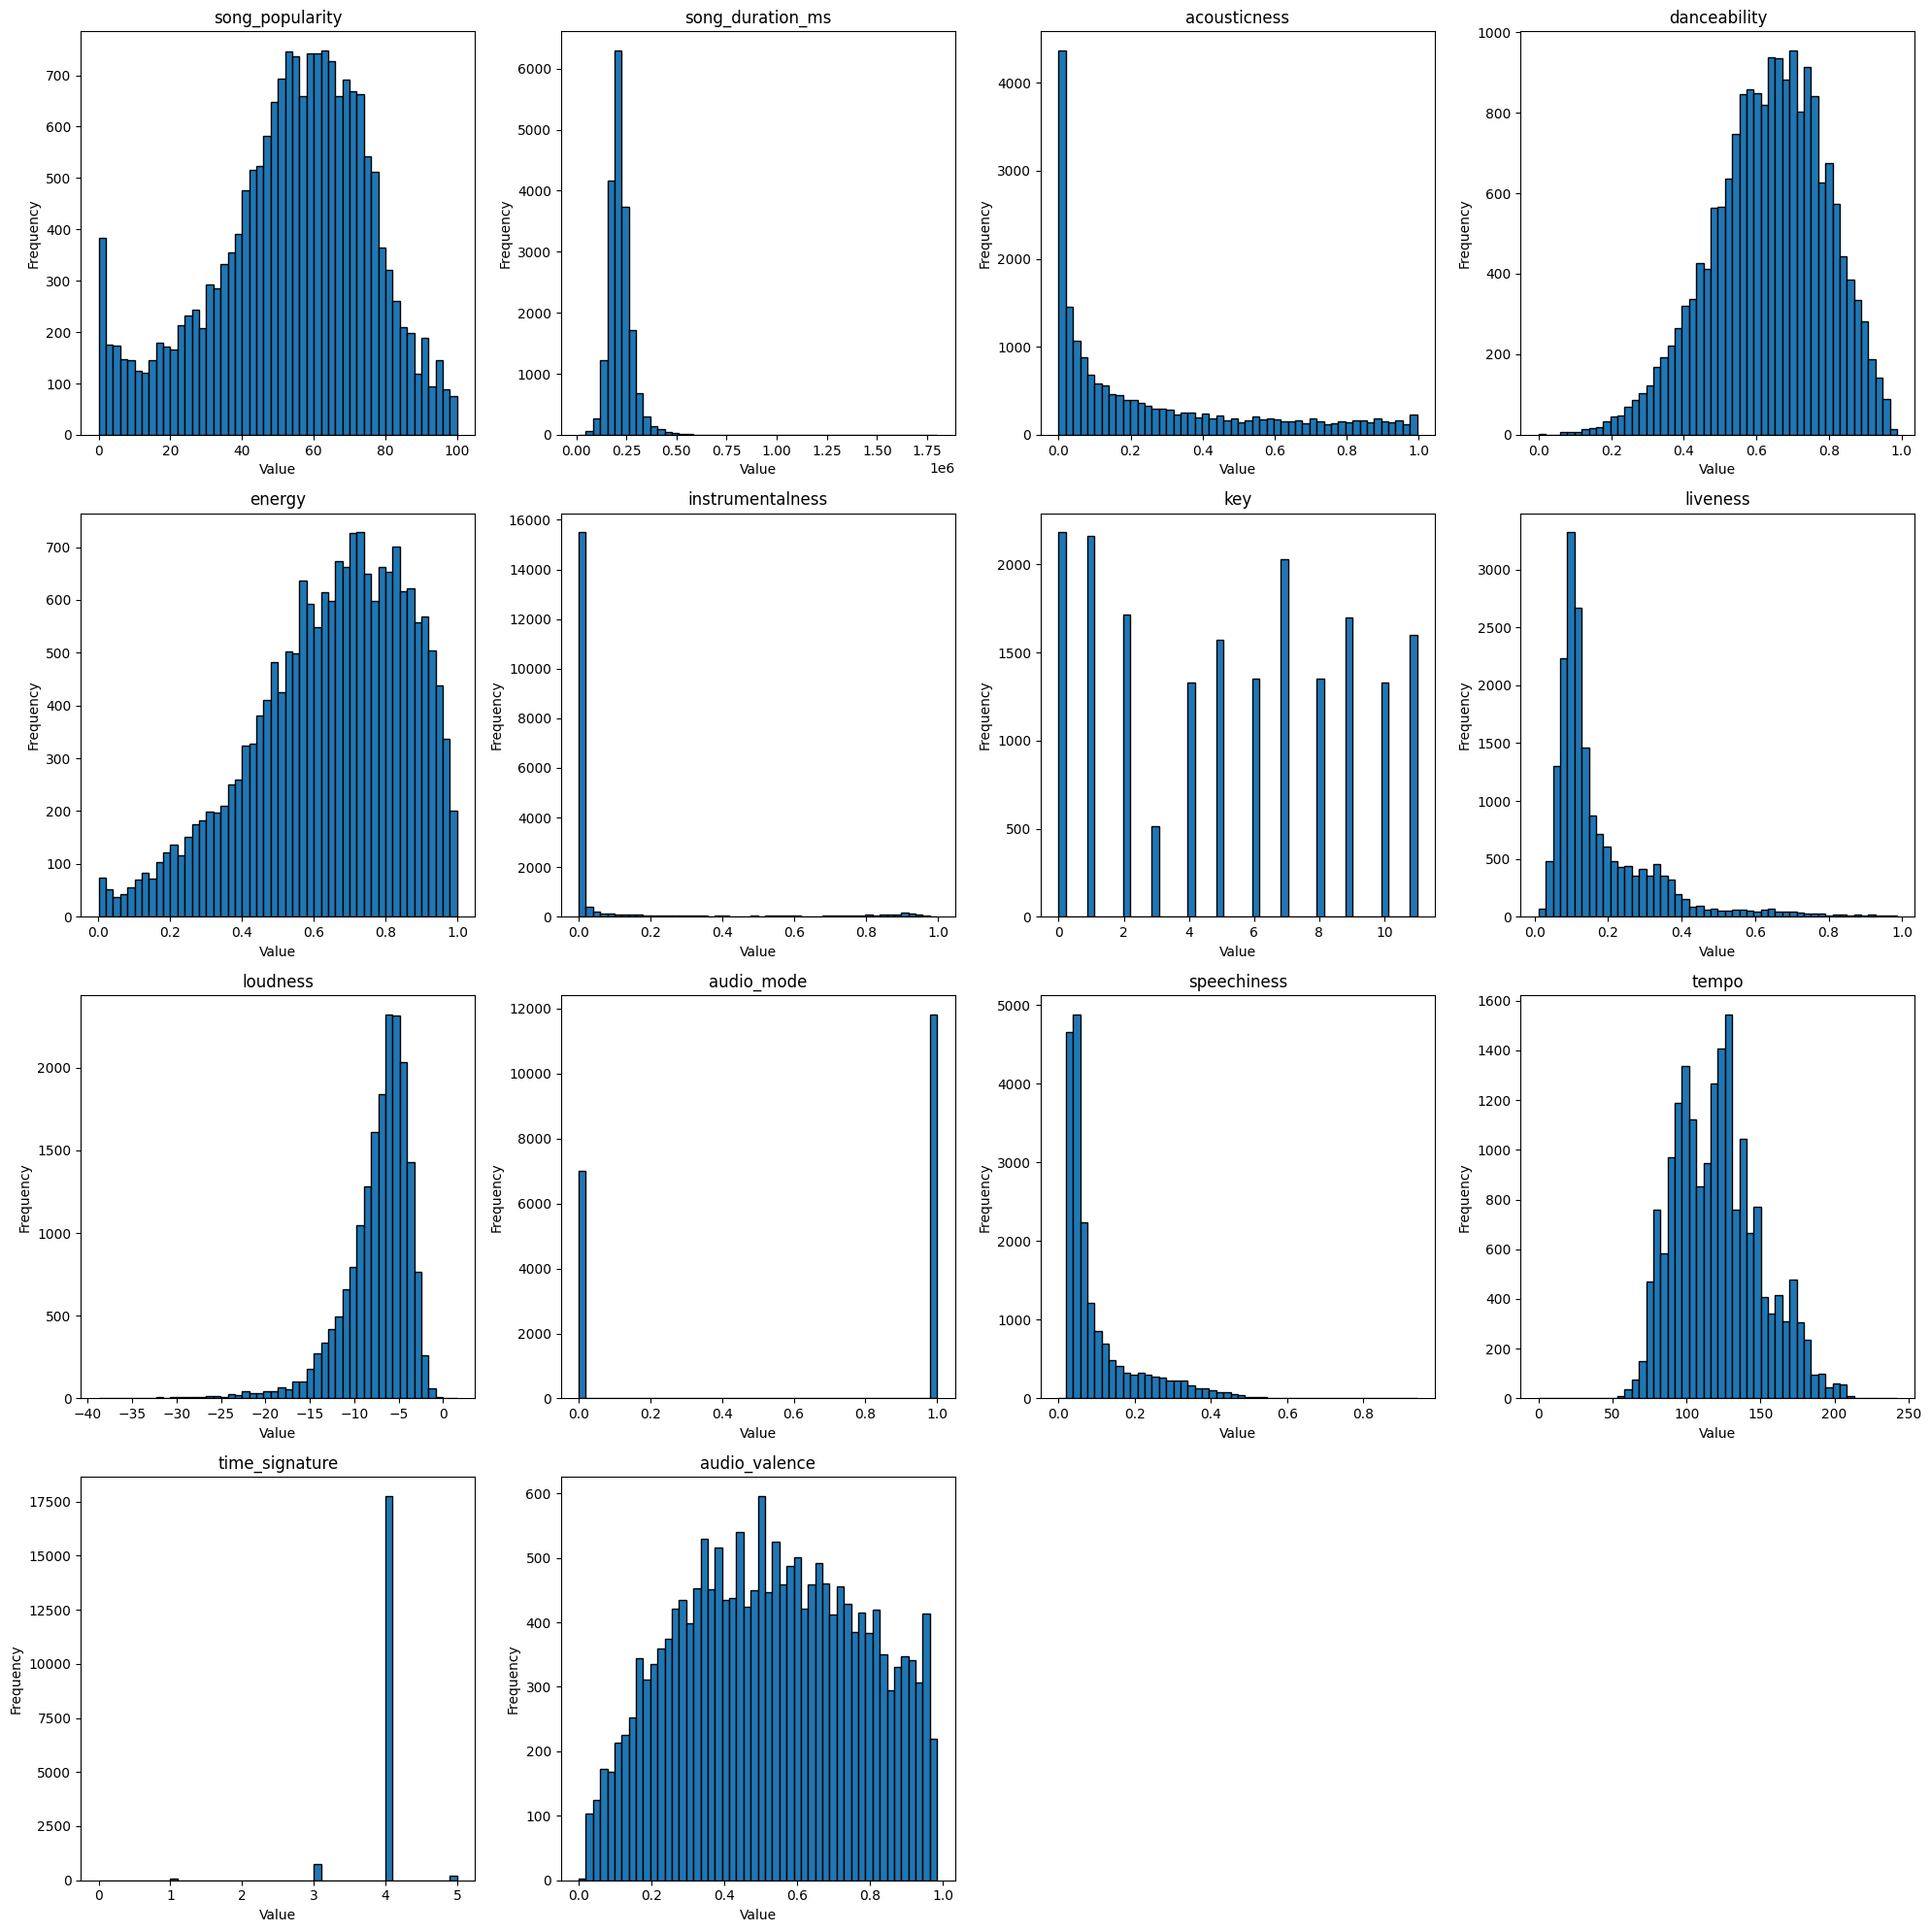

In [36]:
# Selecting only numeric columns for histograms
numeric_columns = song_data.select_dtypes(include=["number"]).columns

# Set up a grid for 14 plots (4x4 grid as an example)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size and figure size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Loop through the numeric columns and plot
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    data = song_data[column].dropna()  # Drop NaN values before plotting
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Hide unused subplots if there are fewer than 16 columns
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

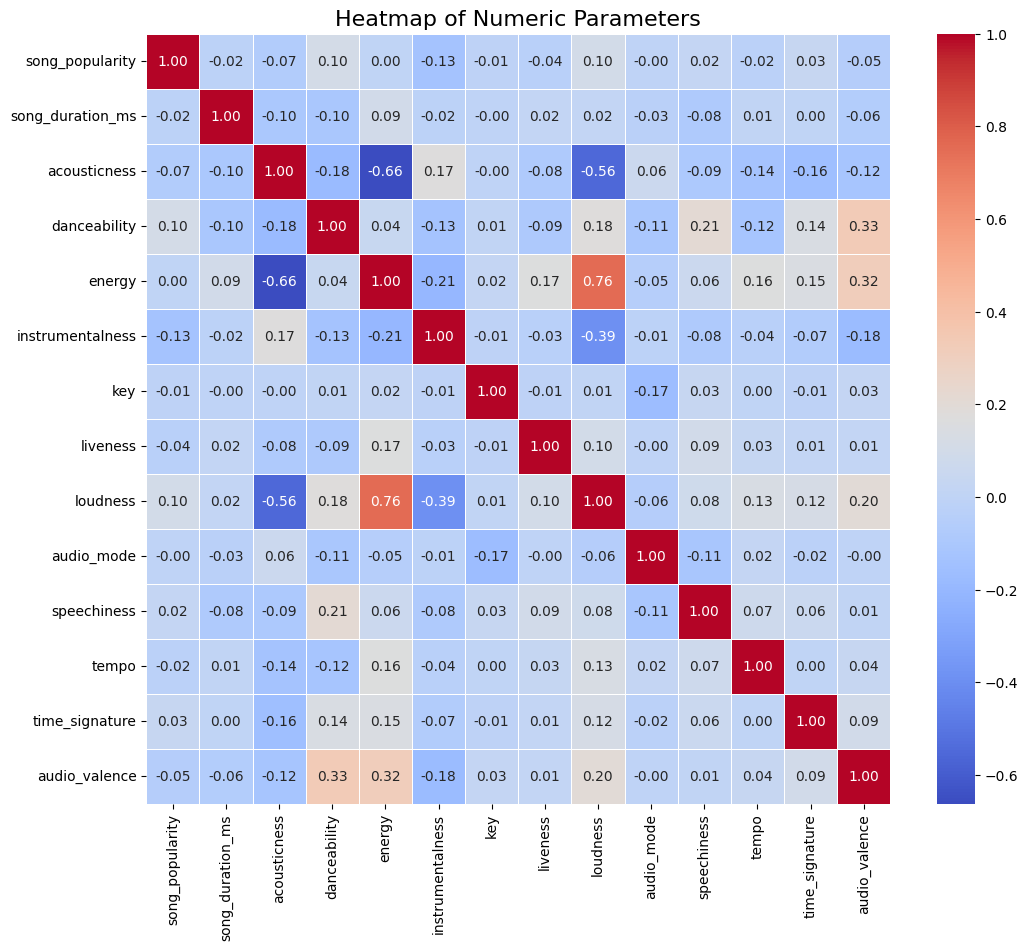

In [39]:
# Select numeric columns for heatmap
numeric_data = song_data.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numeric Parameters", fontsize=16)
plt.show()